Image Classification using FashionMNIST datasaet

In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D


Load Dataset

In [5]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#For any given pixel of the image, the value assigned to that pixel can fall between 0 and 255. 
#Which brings us to our next line of code:
x_train, x_test = x_train /255.0, x_test /255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000,)


In [4]:
#the data is only 2D!
#convolution expects height x width x clor
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(50000, 32, 32, 3, 1)


In [6]:
#number of classes
K = len(set(y_train))
print("number of classes: ", K)

number of classes:  10


Build the CNN

In [7]:
#Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [8]:
#Complete and fit 
#Note: make sure you are using hte GPU for this!
model.compile(optimizer='adam',  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)


Epoch 1/15
1563/1563 [==============================] - 70s 44ms/step - loss: 1.5826 - accuracy: 0.4211 - val_loss: 1.3653 - val_accuracy: 0.5143
Epoch 2/15
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3012 - accuracy: 0.5296 - val_loss: 1.1451 - val_accuracy: 0.5907
Epoch 3/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1695 - accuracy: 0.5813 - val_loss: 1.0623 - val_accuracy: 0.6181
Epoch 4/15
1563/1563 [==============================] - 60s 39ms/step - loss: 1.0764 - accuracy: 0.6160 - val_loss: 0.9799 - val_accuracy: 0.6549
Epoch 5/15
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9988 - accuracy: 0.6438 - val_loss: 0.9415 - val_accuracy: 0.6686
Epoch 6/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9367 - accuracy: 0.6644 - val_loss: 0.9060 - val_accuracy: 0.6817
Epoch 7/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8823 - accuracy: 0.6856 - val_loss: 0.8743 -

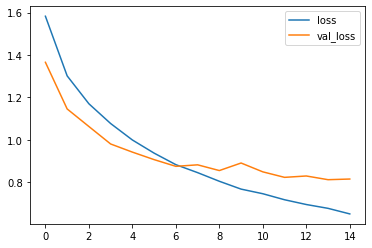

In [9]:
#Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

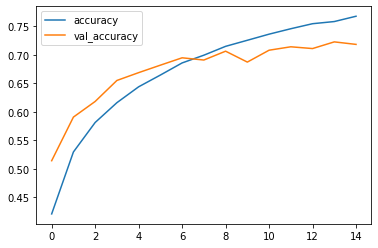

In [10]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 [==============================] - 3s 8ms/step
Confusion matrix, without normalization
[[745  21  41  26  15   7  16  10  77  42]
 [ 10 876   3   7   2   3  17   3  27  52]
 [ 51   2 577 103  65  61  86  28  21   6]
 [ 12   7  62 608  43 132  80  22  19  15]
 [ 11   4  97 102 612  31  72  58  12   1]
 [ 10   4  36 258  42 562  40  30  13   5]
 [  3   6  32  63  22  23 834   6  10   1]
 [ 12   0  20  62  58  52  12 762  12  10]
 [ 44  33   9  16   4   2   7   4 862  19]
 [ 27 117  10  28   5   8  17  12  33 743]]


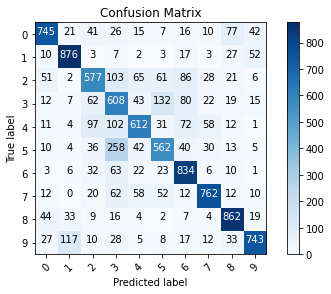

In [11]:
from sklearn.metrics import confusion_matrix 
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion Matrix', 
                          cmap=plt.cm.Blues):
    """
    This funciton pronts out confusion matrix
    Normalization can be applied by setting 'nomalize=True
    """

    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion metrix")

    else:
      print('Confusion matrix, without normalization')
    
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i,j], fmt),
               horizontalalignment="center",
               color="white" if cm[i,j] > thresh else "black")
      
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [12]:
#Labels mapping
labels = '''
airplane
automoile
bird
cat
deer
dog
frog
horse
ship
truck
'''.split()

Text(0.5, 1.0, 'True label: truck Predicted: cat')

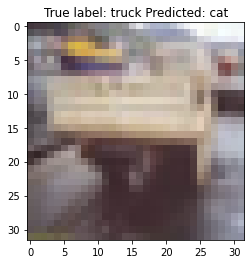

In [15]:
#shwo some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))